# **Econometria Aplicada**

## Aula 3 - Modelos de probabilidade (Probit e Logit)

---

**Motivação**:

Qual é a probabilidade de os EUA entrarem em recessão nos próximos 12 meses? A resposta para essa pergunta se faz importante não apenas no contexto norte-americano, mas em todas as economias. Estrella e Mishkin (1988) analisaram a capacidade de variáveis financeiras em antecipar recessões nos EUA. Os autores encontraram que a inclinação da estrutura a termo da taxa de juros dos títulos do Tesouro norte-americano, especialmente a diferença entre os títulos de 10 anos e os de 3 meses. Qual é a intuição por trás disso? Se a diferença entre as taxas for negativa, assumindo que elas reflitam (em alguma medida) a expectativa para o comportamento das taxas de juros de curto prazo ao longo do tempo, significa que se espera que a atividade econômica no futuro se desacelere (compatível com uma trajetória de taxas menores ao longo do tempo).

### **Bibliotecas**


In [5]:
install.packages("quantmod") # para manipulação de dados

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [6]:
library(quantmod)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [7]:
library(ggplot2)

### **Dados**


In [8]:
tickers <- c( 
 "USREC", # O indicador de recessões do NBER
 "GS10", # A taxa de juros de títulos de 10 anos com maturidade constante
 "TB3MS", # A taxa de juros de títulos de 3 meses
 "UNRATE" # A taxa de desemprego
)

In [9]:
# Carrega o conjunto de dados usando a função getSymbols do pacote FRED
dataset <- getSymbols(tickers, src='FRED', auto.assign=TRUE)

In [10]:
# Criação de dataframe para cada ticker

usrec_df <- data.frame(date = as.Date(index(USREC)), USREC)
rownames(usrec_df) <- NULL

gs10_df <- data.frame(date = as.Date(index(GS10)), GS10)
rownames(gs10_df) <- NULL

tb3ms_df <- data.frame(date = as.Date(index(TB3MS)), TB3MS)
rownames(tb3ms_df) <- NULL

unrate_df <- data.frame(date = as.Date(index(UNRATE)), UNRATE)
rownames(unrate_df) <- NULL

### **1. A inclinação da estrutura a termo da taxa de juros**

- Primeiro, vamos criar a nossa variável de interesse. Crie uma variável que represente a diferença entre a taxa de juros de títulos de 10 anos e a taxa de juros de títulos de 3 meses.

In [11]:
gs_tb_diff_df <- merge(gs10_df, tb3ms_df)
gs_tb_diff_df$SLOPE <- gs_tb_diff_df$GS10 - gs_tb_diff_df$TB3MS

In [12]:
head(gs_tb_diff_df, 5)

,date,GS10,TB3MS,SLOPE
,<date>,<dbl>,<dbl>,<dbl>
1,1953-04-01,2.83,2.19,0.64
2,1953-05-01,3.05,2.16,0.89
3,1953-06-01,3.11,2.11,1.00
4,1953-07-01,2.93,2.04,0.89
5,1953-08-01,2.95,2.04,0.91


#### **2. Vamos olhar para os dados**

- Como se comportam a inclinação da taxa de juros e a taxa de desemprego ao longo do tempo? 

> ##### *a. Faça um gráfico com a inclinação da curva de juros ao longo do tempo.*

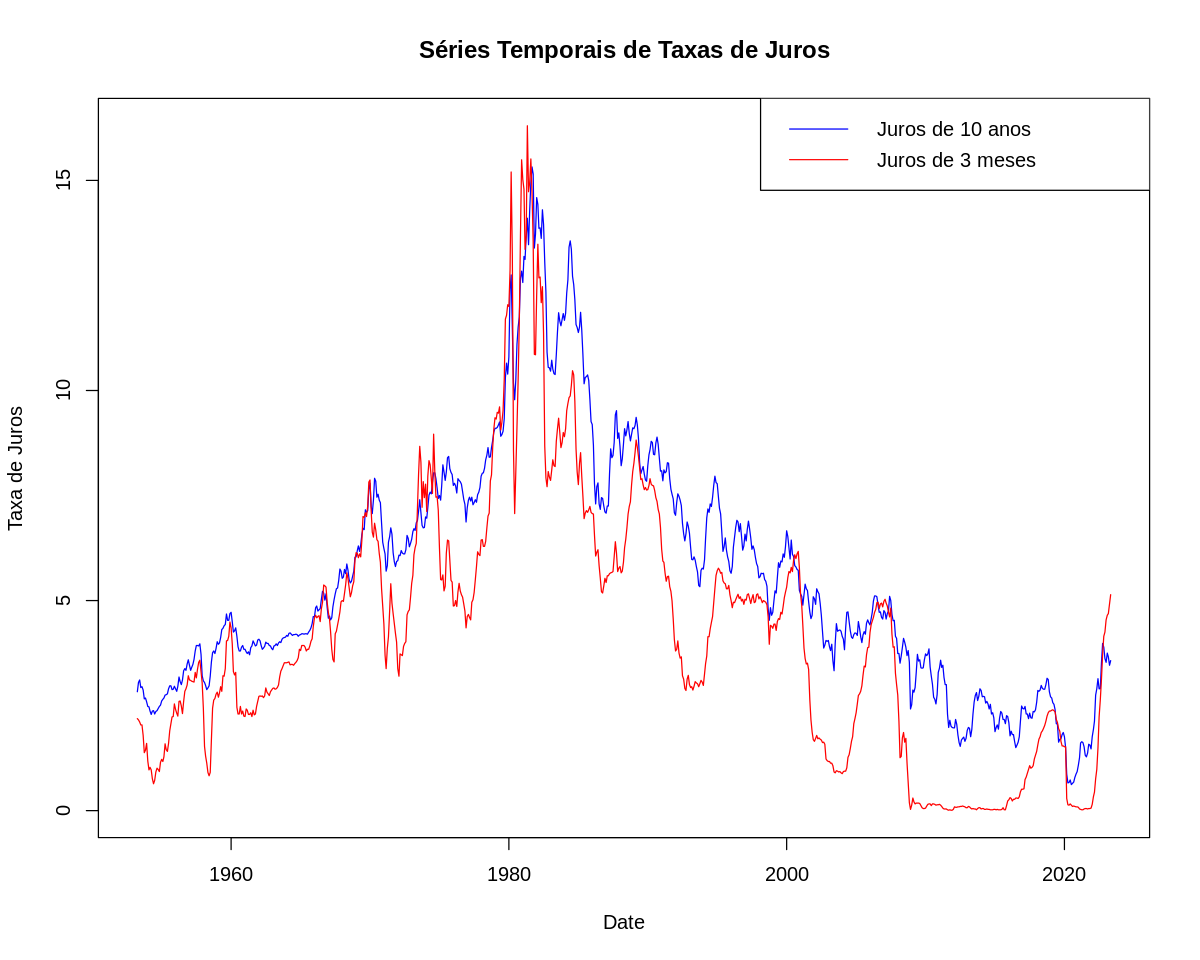

In [59]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 10, repr.plot.height = 8)

# Definir os limites dos eixos y
ylim <- range(c(gs_tb_diff_df$TB3MS, gs_tb_diff_df$GS10))

# Plotar a série GS10 em azul
plot(gs_tb_diff_df$date, gs_tb_diff_df$GS10, type = "l", col = "blue", xlab = "Date", ylab = "Taxa de Juros", ylim = ylim)

# Adicionar a série TB3MS em vermelho
lines(gs_tb_diff_df$date, gs_tb_diff_df$TB3MS, col = "red")

# Adicionar uma legenda
legend("topright", legend = c("Juros de 10 anos", "Juros de 3 meses"), col = c("blue", "red"), lty = 1)

# Adicionar título ao gráfico
title(main = "Séries Temporais de Taxas de Juros")

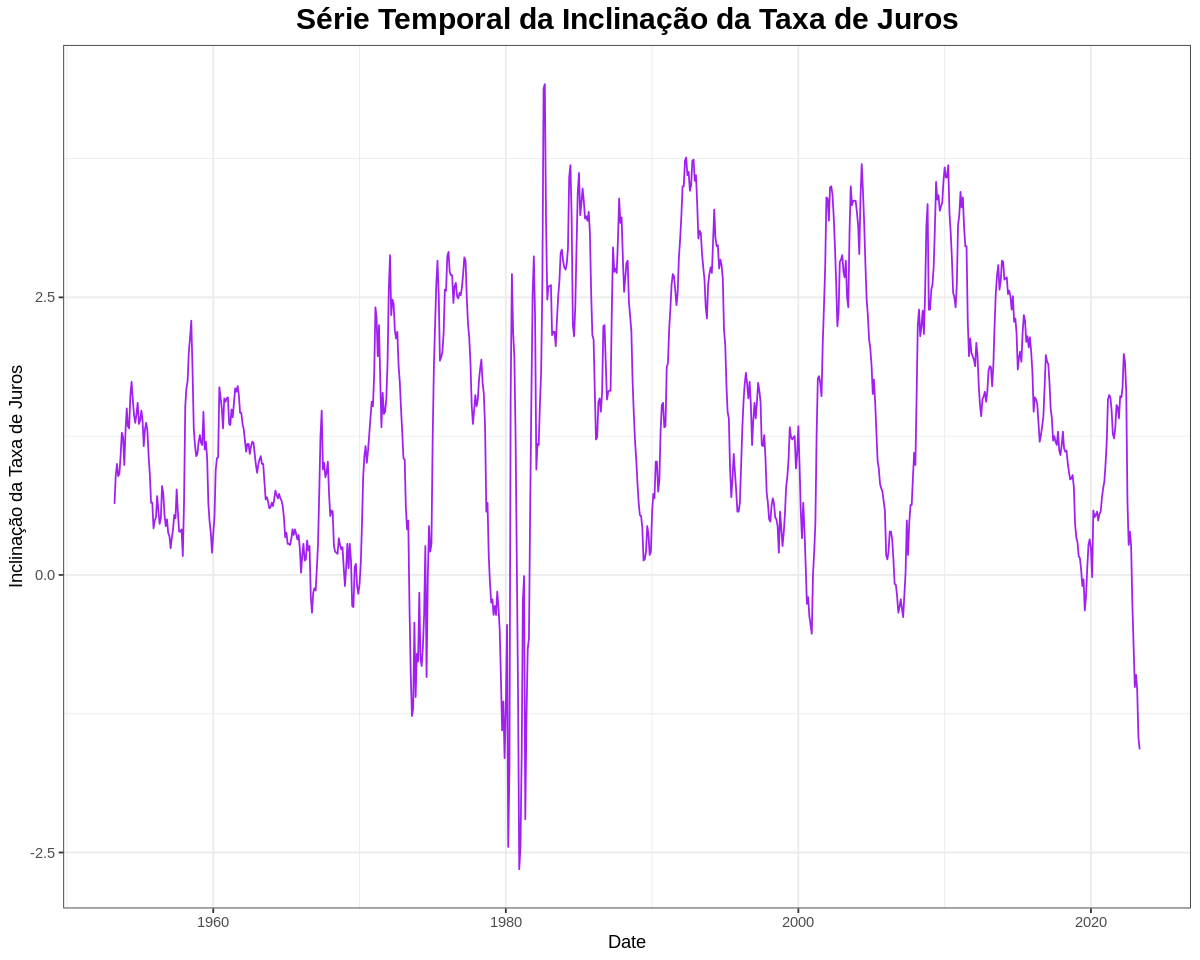

In [53]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 10, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
p <- ggplot(gs_tb_diff_df, aes(x = date, y = SLOPE)) +
  geom_line(color = "purple") +
  labs(x = "Date", y = "Inclinação da Taxa de Juros") +
  ggtitle("Série Temporal da Inclinação da Taxa de Juros") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5))

# Exibir o gráfico
print(p)

> ##### *b. Faça um gráfico com a taxa de desemprego ao longo do tempo.*

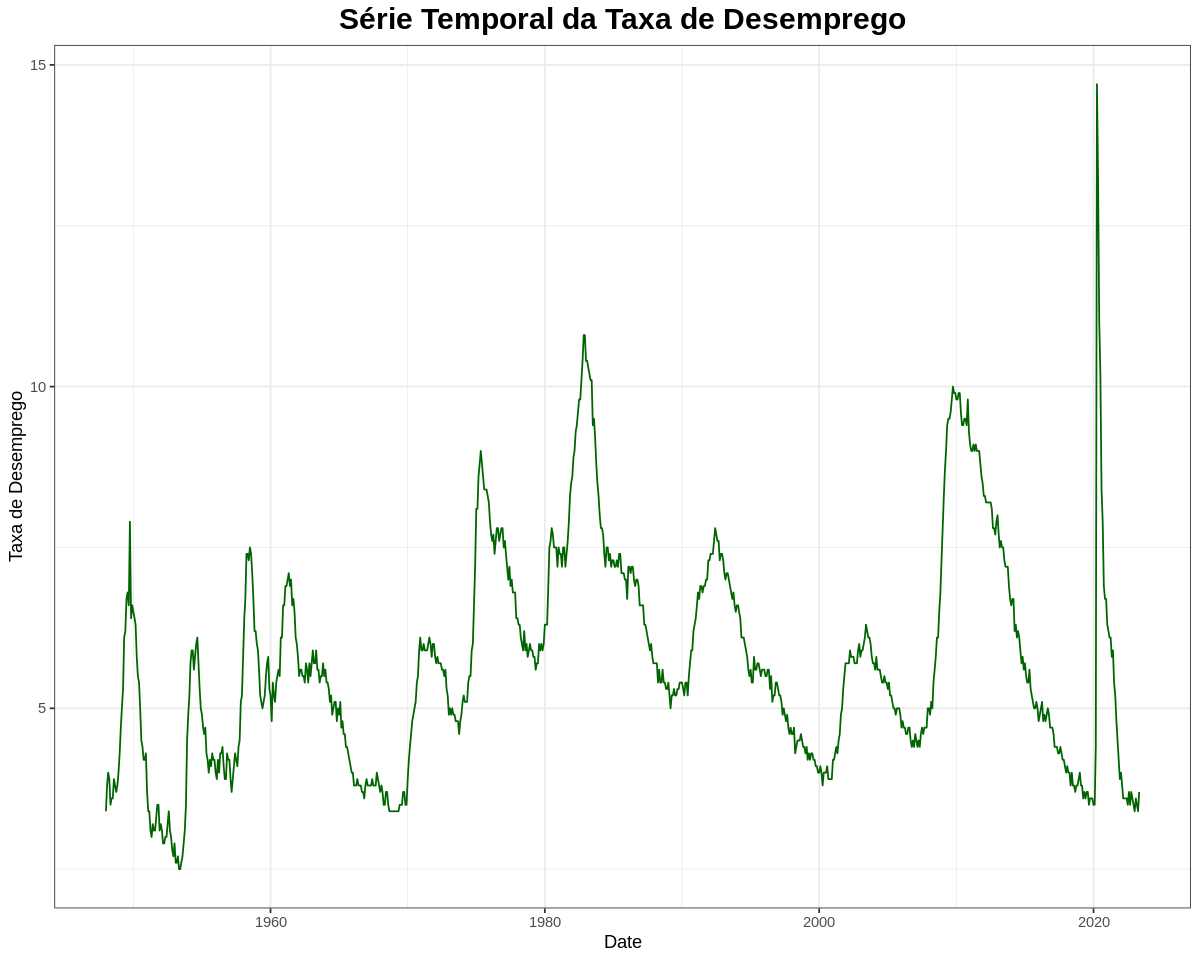

In [51]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 10, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
p <- ggplot(unrate_df, aes(x = date, y = UNRATE)) +
  geom_line(color = "darkgreen") +
  labs(x = "Date", y = "Taxa de Desemprego") +
  ggtitle("Série Temporal da Taxa de Desemprego") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5))

# Exibir o gráfico
print(p)

> ##### *c. Com as mesmas séries dos itens (a) e (b), faça dois gráficos que tenham não apenas as variáveis ao longo do tempo, mas também que as áreas hachuradas representem as recessões datadas pelo NBER.*

In [22]:
# Recessões datadas pelo NBER

recessions <- read.table(textConnection(
"Peak, Trough
1857-06-01, 1858-12-01
1860-10-01, 1861-06-01
1865-04-01, 1867-12-01
1869-06-01, 1870-12-01
1873-10-01, 1879-03-01
1882-03-01, 1885-05-01
1887-03-01, 1888-04-01
1890-07-01, 1891-05-01
1893-01-01, 1894-06-01
1895-12-01, 1897-06-01
1899-06-01, 1900-12-01
1902-09-01, 1904-08-01
1907-05-01, 1908-06-01
1910-01-01, 1912-01-01
1913-01-01, 1914-12-01
1918-08-01, 1919-03-01
1920-01-01, 1921-07-01
1923-05-01, 1924-07-01
1926-10-01, 1927-11-01
1929-08-01, 1933-03-01
1937-05-01, 1938-06-01
1945-02-01, 1945-10-01
1948-11-01, 1949-10-01
1953-07-01, 1954-05-01
1957-08-01, 1958-04-01
1960-04-01, 1961-02-01
1969-12-01, 1970-11-01
1973-11-01, 1975-03-01
1980-01-01, 1980-07-01
1981-07-01, 1982-11-01
1990-07-01, 1991-03-01
2001-03-01, 2001-11-01
2007-12-01, 2009-06-01
2020-02-01, 2021-06-01"), sep=',',
colClasses=c('Date', 'Date'), header=TRUE)

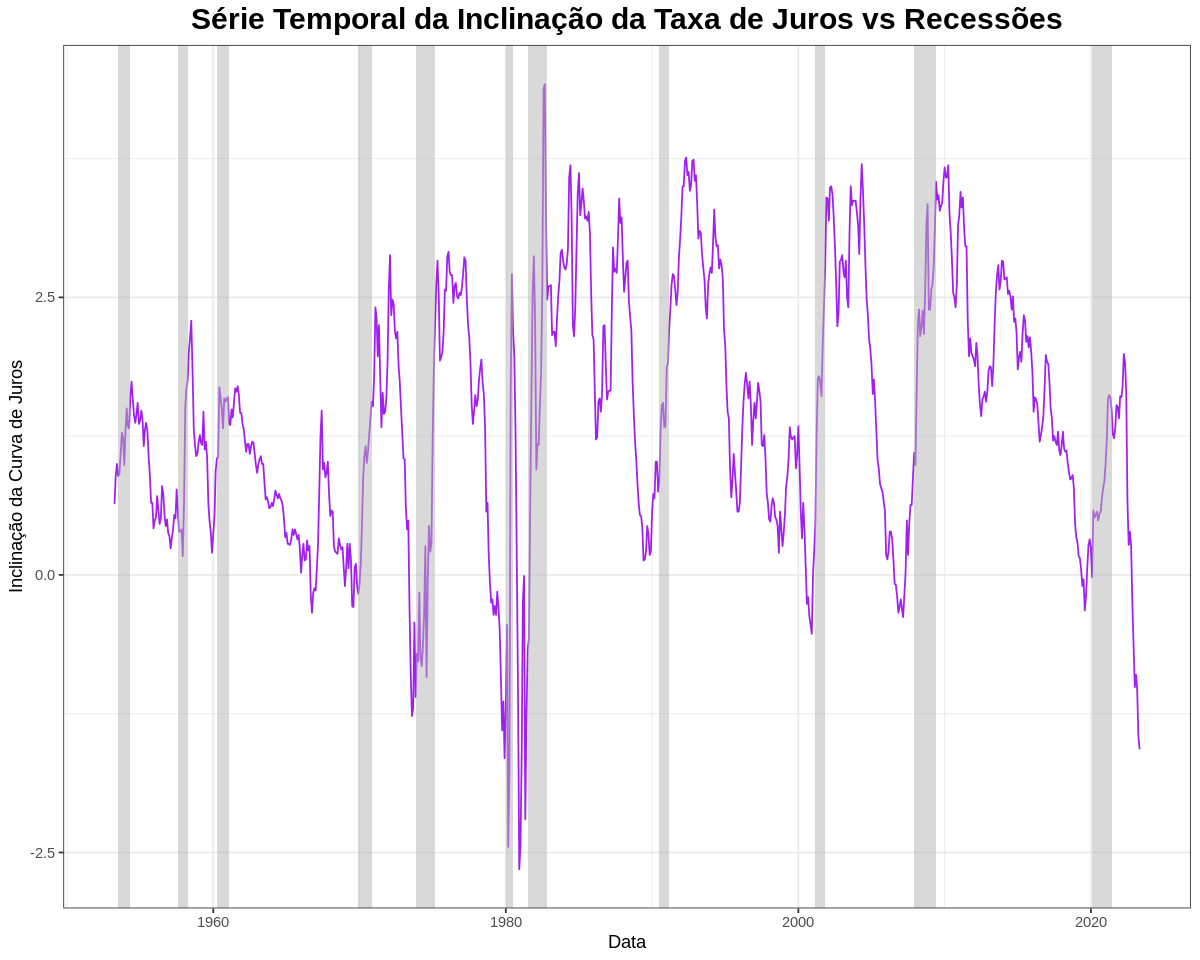

In [44]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 10, repr.plot.height = 8)

# Criar o dataframe para as áreas hachuradas
recessions <- recessions[recessions$Peak >= min(gs_tb_diff_df$date) & recessions$Trough <= max(gs_tb_diff_df$date), ]

# Criar o objeto de plotagem
p <- ggplot() +
  geom_line(data = gs_tb_diff_df, aes(x = date, y = SLOPE), color = "purple") +
  geom_rect(data = recessions, aes(xmin = Peak, xmax = Trough, ymin = -Inf, ymax = Inf), fill = "gray70", alpha = 0.5, inherit.aes = FALSE) +
  labs(x = "Data", y = "Inclinação da Curva de Juros") +
  ggtitle("Série Temporal da Inclinação da Taxa de Juros vs Recessões") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5))

# Ajustar a escala dos eixos para cobrir todo o intervalo de datas
p <- p + scale_x_date(limits = c(min(gs_tb_diff_df$date), max(gs_tb_diff_df$date)))

# Exibir o gráfico
print(p)

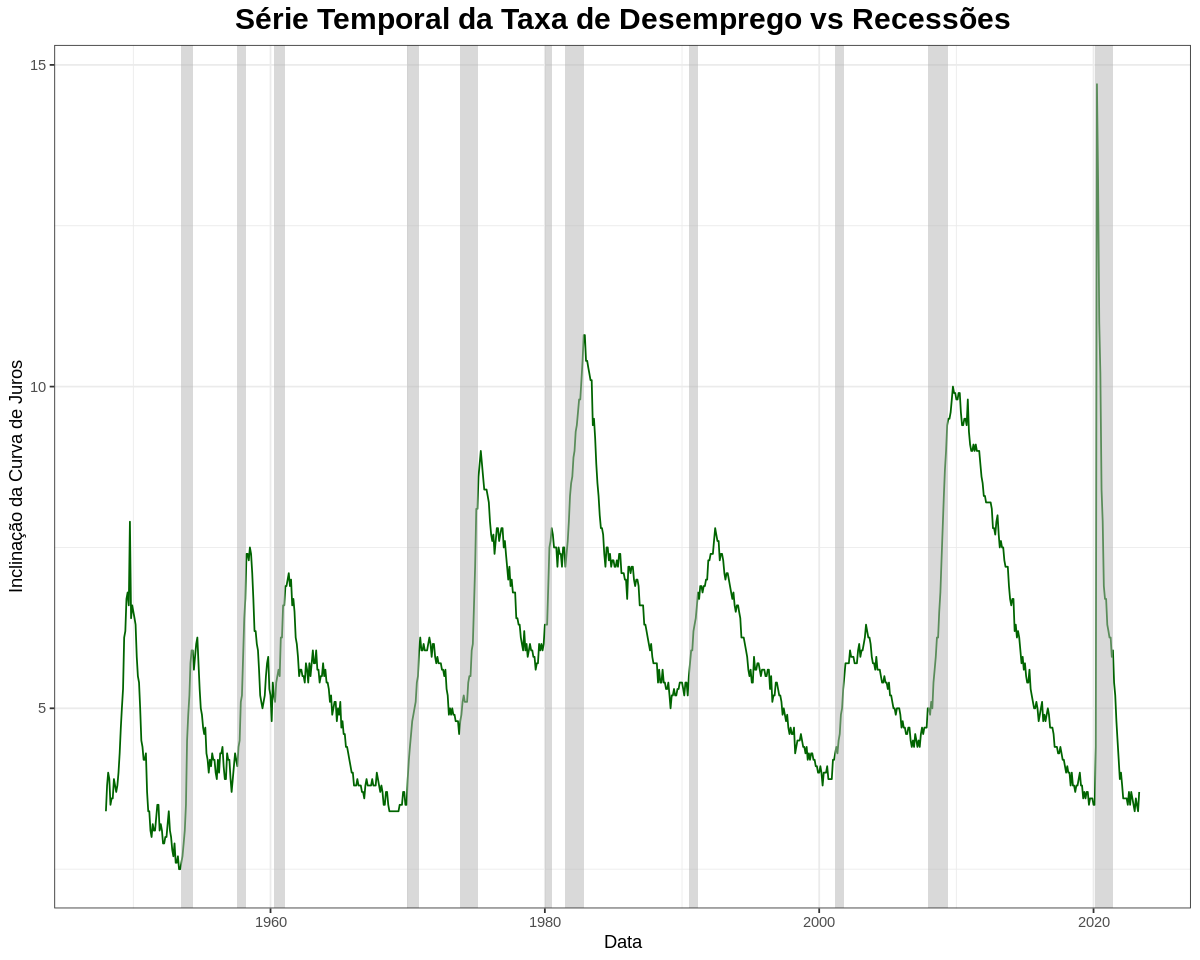

In [45]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 10, repr.plot.height = 8)

# Criar o dataframe para as áreas hachuradas
recessions <- recessions[recessions$Peak >= min(unrate_df$date) & recessions$Trough <= max(unrate_df$date), ]

# Criar o objeto de plotagem
p <- ggplot() +
  geom_line(data = unrate_df, aes(x = date, y = UNRATE), color = "darkgreen") +
  geom_rect(data = recessions, aes(xmin = Peak, xmax = Trough, ymin = -Inf, ymax = Inf), fill = "gray70", alpha = 0.5, inherit.aes = FALSE) +
  labs(x = "Data", y = "Inclinação da Curva de Juros") +
  ggtitle("Série Temporal da Taxa de Desemprego vs Recessões") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5))

# Ajustar a escala dos eixos para cobrir todo o intervalo de datas
p <- p + scale_x_date(limits = c(min(unrate_df$date), max(unrate_df$date)))

# Exibir o gráfico
print(p)